In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#cargar archivo desde seaborn 
df=pd.read_csv('Mexico_limpio.csv')
#eliminamos la columna unnamed 
df= df.drop(['Unnamed: 0'], axis=1)
df.head(5)

,listing_url,name,description,neighborhood_overview,picture_url,host_name,host_since,host_response_time,host_response_rate,host_is_superhost,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,https://www.airbnb.com/rooms/35797,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Santa Fe Mall, Interloma Park and the Lion Des...",https://a0.muscache.com/pictures/f395ab78-1185...,Dici,2010-06-28,a few days or more,0%,f,...,5.00,5.00,5.00,4.80,4.70,1.0,1.0,0.0,0.0,1.70
1,https://www.airbnb.com/rooms/44616,Condesa Haus,A new concept of hosting in mexico through a b...,No se proporcionan detalles,https://a0.muscache.com/pictures/251410/ec75fe...,Fernando,2010-08-09,within an hour,100%,t,...,4.70,4.87,4.78,4.98,4.48,8.0,4.0,1.0,0.0,0.41
2,https://www.airbnb.com/rooms/67703,"2 bedroom apt. deco bldg, Condesa","Comfortably furnished, sunny, 2 bedroom apt., ...",No se proporcionan detalles,https://a0.muscache.com/pictures/3281720/6f078...,Nicholas,2011-01-04,within an hour,71%,t,...,4.75,4.94,4.92,4.98,4.91,2.0,2.0,0.0,0.0,0.31
3,https://www.airbnb.com/rooms/70644,Beautiful light Studio Coyoacan- full equipped !,COYOACAN designer studio quiet & safe! well eq...,Coyoacan is a beautiful neighborhood famous fo...,https://a0.muscache.com/pictures/f397d2da-d045...,Trisha,2010-08-24,within a few hours,100%,t,...,4.96,4.96,4.98,4.96,4.92,3.0,2.0,1.0,0.0,0.83
4,https://www.airbnb.com/rooms/107078,NEW DESIGNER LOFT,Is the best ever place triple L <br />Location...,"Is located in the best area of Mexico City, Po...",https://a0.muscache.com/pictures/bd64f86d-4931...,Andrea,2011-04-27,within an hour,100%,t,...,5.00,5.00,4.73,4.91,4.82,3.0,3.0,0.0,0.0,0.11


In [3]:
f1=df.iloc[ :  , [8,9,10,13,14,20,24,25,28,40] ]
f1

,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
0,0%,f,t,Entire villa,Entire home/apt,f,2.0,1.0,1093.1,5.00
1,100%,t,t,Entire home,Entire home/apt,f,2.9,1.0,1511.6,4.70
2,71%,t,t,Entire rental unit,Entire home/apt,f,4.0,1.0,2029.0,4.75
3,100%,t,t,Entire rental unit,Entire home/apt,f,2.0,1.0,1140.0,4.96
4,100%,t,t,Entire loft,Entire home/apt,f,2.0,1.5,1093.1,5.00
...,...,...,...,...,...,...,...,...,...,...
26577,100%,t,t,Private room in guesthouse,Private room,t,4.0,1.0,488.0,5.00
26578,100%,f,t,Room in hotel,Private room,t,2.0,1.0,1093.1,5.00
26579,100%,f,t,Room in hotel,Private room,t,2.0,1.0,2700.0,5.00
26580,100%,f,t,Room in hotel,Private room,t,2.0,1.0,2600.0,5.00


In [4]:
#convertimos string a tipos numéricos
f1['host_is_superhost'] = f1['host_is_superhost'].replace({'f': 0, 't': 1})
f1['host_identity_verified'] = f1['host_identity_verified'].replace({'f': 0, 't': 1})
f1['instant_bookable'] = f1['instant_bookable'].replace({'f': 0, 't': 1})

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
f1['property_type'] = encoder.fit_transform(f1['property_type'])

f1['host_response_rate'] = f1['host_response_rate'].astype(str).str.rstrip('%')
f1['host_response_rate'] = pd.to_numeric(f1['host_response_rate'], errors='coerce').fillna(0)

f1['room_type'] = f1['room_type'].map({
    'Entire home/apt': 1,
    'Private room': 2,
    'Shared room': 3,
    'Hotel room': 4
})

C:\Users\valer\AppData\Local\Temp\ipykernel_27112\3436113170.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  f1['host_is_superhost'] = f1['host_is_superhost'].replace({'f': 0, 't': 1})
C:\Users\valer\AppData\Local\Temp\ipykernel_27112\3436113170.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f1['host_is_superhost'] = f1['host_is_superhost'].replace({'f': 0, 't': 1})
C:\Users\valer\AppData\Local\Temp\ipykernel_27112\3436113170.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be remo

In [5]:
#f2 = Entire home/apt
f2= f1[(f1["room_type"] == 3)]

In [6]:
f2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401 entries, 115 to 26561
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   host_response_rate         401 non-null    float64
 1   host_is_superhost          401 non-null    int64  
 2   host_identity_verified     401 non-null    int64  
 3   property_type              401 non-null    int64  
 4   room_type                  401 non-null    int64  
 5   instant_bookable           401 non-null    int64  
 6   accommodates               401 non-null    float64
 7   bathrooms                  401 non-null    float64
 8   price                      401 non-null    float64
 9   review_scores_cleanliness  401 non-null    float64
dtypes: float64(5), int64(5)
memory usage: 34.5 KB


<Axes: xlabel='room_type', ylabel='price'>

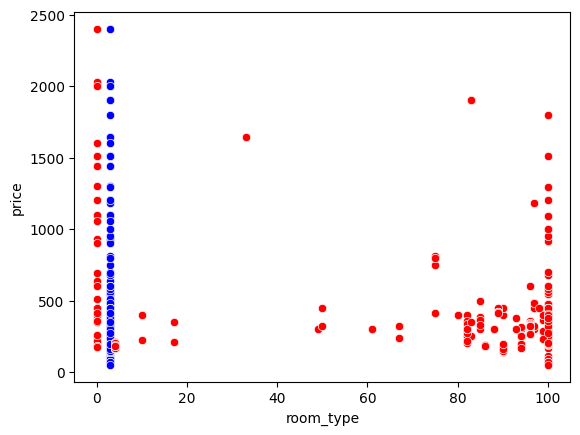

In [7]:
#imprimimos el scatter plot entre la variable dependiente total e independiente (a)
from turtle import color 
sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='host_response_rate', y='price', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='price'>

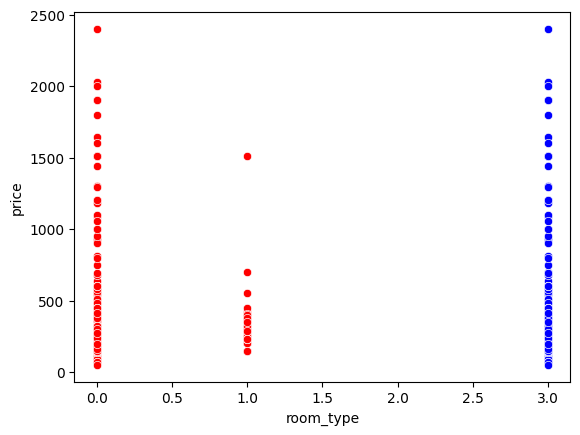

In [8]:
from turtle import color 
sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='host_is_superhost', y='price', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='price'>

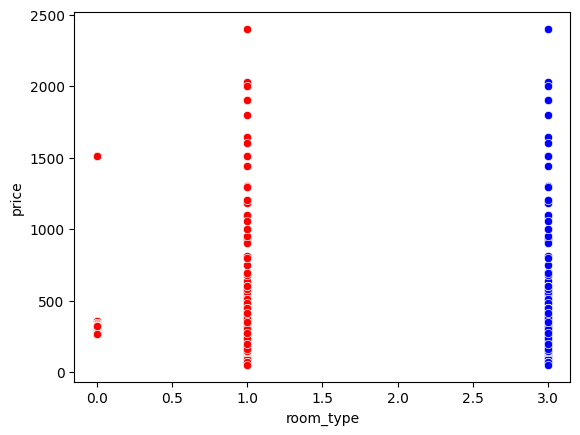

In [9]:
from turtle import color 
sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='host_identity_verified', y='price', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='price'>

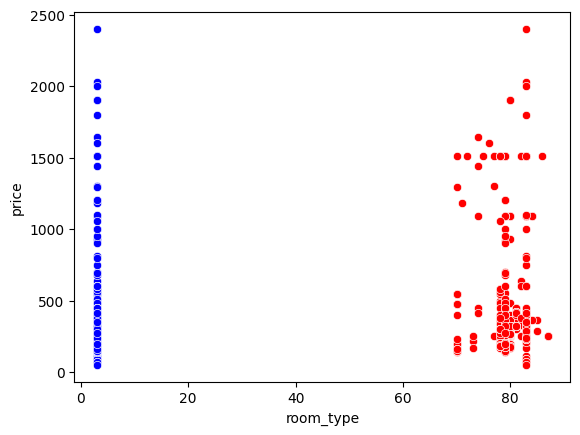

In [10]:
from turtle import color 
sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='property_type', y='price', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='price'>

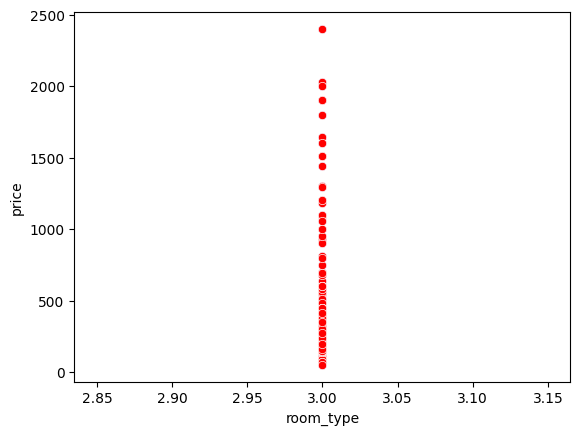

In [11]:
from turtle import color 
sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='room_type', y='price', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='price'>

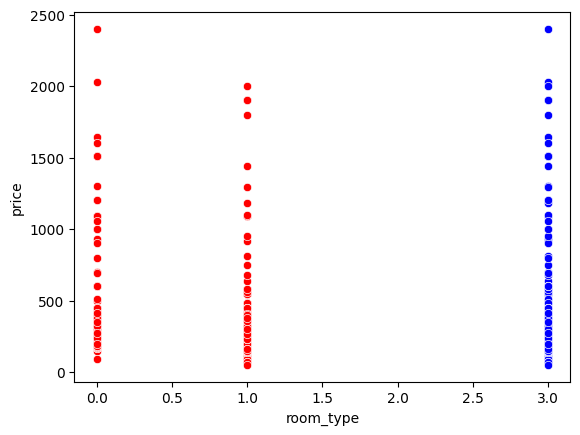

In [12]:
from turtle import color 
sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='instant_bookable', y='price', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='price'>

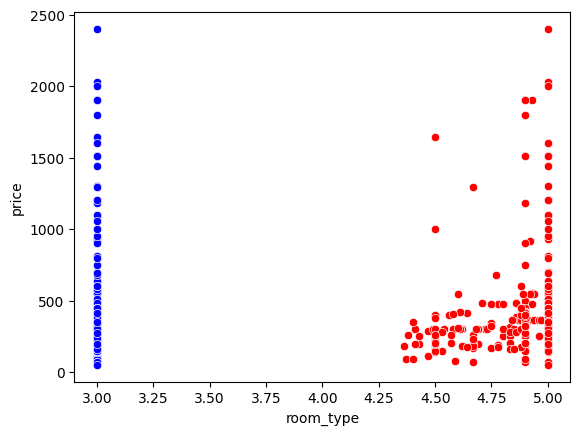

In [13]:
from turtle import color 
sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='review_scores_cleanliness', y='price', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='accommodates'>

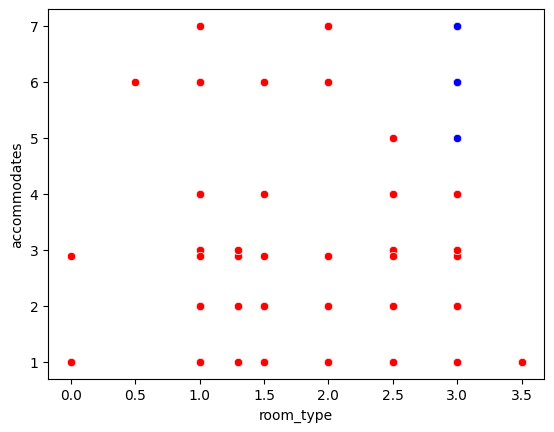

In [14]:
from turtle import color 
sns.scatterplot(x='room_type', y='accommodates', color='blue', data=f2)
sns.scatterplot(x='bathrooms', y='accommodates', color='red', data=f2)

In [15]:
#declaración de las variables independientes que se van a comparar con el precio 
Var_Indep= f2[['host_response_rate']]
Var_Indep2=f2[['host_is_superhost']]
Var_Indep3=f2[['room_type']]
Var_Indep4=f2[['host_identity_verified']]
Var_Indep5= f2[['property_type']]
Var_Indep6= f2[['instant_bookable']]
Var_Indep7= f2[['review_scores_cleanliness']]
#declaración de variable independiente para accommodates 
Var_Indep8= f2[['bathrooms']]

In [16]:
#variables independientes para la regresión lineal
Var_Dep= f2['price']
Var_Dep2= f2['accommodates']

In [17]:
#se define model como función de regresión lineal 
from sklearn.linear_model import LinearRegression 
model=LinearRegression()
model2=LinearRegression()
model3=LinearRegression()
model4=LinearRegression()
model5=LinearRegression()
model6=LinearRegression()
model7=LinearRegression()
model8=LinearRegression()

In [18]:
#verficamos la función relacionada al modelo 
type(model)
type(model2)
type(model3)
type(model4)
type(model5)
type(model6)
type(model7)
type(model8)

sklearn.linear_model._base.LinearRegression

In [19]:
#ajustamos el modelo con las variables antes declaradas
model.fit(X=Var_Indep, y=Var_Dep)
model2.fit(X=Var_Indep2, y=Var_Dep)
model3.fit(X=Var_Indep3, y=Var_Dep)
model4.fit(X=Var_Indep4, y=Var_Dep)
model5.fit(X=Var_Indep5, y=Var_Dep)
model6.fit(X=Var_Indep6, y=Var_Dep)
model7.fit(X=Var_Indep7, y=Var_Dep)
model8.fit(X=Var_Indep8, y=Var_Dep2)

LinearRegression()

In [20]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-3.23856494]),
 'rank_': 1,
 'singular_': array([869.85112666]),
 'intercept_': np.float64(667.3618882925116)}

In [21]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model2.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_is_superhost'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-124.56462465]),
 'rank_': 1,
 'singular_': array([6.50033569]),
 'intercept_': np.float64(472.45212464589235)}

In [22]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model3.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['room_type'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.]),
 'rank_': 0,
 'singular_': array([0.]),
 'intercept_': np.float64(457.5416458852868)}

In [23]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model4.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_identity_verified'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-279.00123773]),
 'rank_': 1,
 'singular_': array([7.64388172]),
 'intercept_': np.float64(687.1436619718311)}

In [24]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model5.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['property_type'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([7.12823224]),
 'rank_': 1,
 'singular_': array([65.40299016]),
 'intercept_': np.float64(-107.98847978601884)}

In [25]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model6.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['instant_bookable'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-147.77530611]),
 'rank_': 1,
 'singular_': array([9.98977033]),
 'intercept_': np.float64(536.4042780748664)}

In [26]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model7.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([518.18564934]),
 'rank_': 1,
 'singular_': array([3.29243764]),
 'intercept_': np.float64(-2080.8573074125675)}

In [27]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model8.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bathrooms'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.12641194]),
 'rank_': 1,
 'singular_': array([14.76805037]),
 'intercept_': np.float64(1.4226397847974679)}

**Prediccion de valores**

In [28]:
#predecimos valores
y_pred= model.predict(X=f2[['host_response_rate']])
y_pred

array([667.36188829, 667.36188829, 343.50539405, 343.50539405,
       343.50539405, 667.36188829, 343.50539405, 667.36188829,
       343.50539405, 634.97623887, 343.50539405, 667.36188829,
       401.79956301, 401.79956301, 667.36188829, 667.36188829,
       667.36188829, 667.36188829, 667.36188829, 667.36188829,
       356.45965382, 667.36188829, 424.46951761, 667.36188829,
       667.36188829, 667.36188829, 667.36188829, 424.46951761,
       667.36188829, 362.9367837 , 362.9367837 , 362.9367837 ,
       362.9367837 , 362.9367837 , 343.50539405, 505.43364117,
       362.9367837 , 353.22108887, 343.50539405, 362.9367837 ,
       362.9367837 , 362.9367837 , 362.9367837 , 362.9367837 ,
       667.36188829, 667.36188829, 667.36188829, 667.36188829,
       667.36188829, 667.36188829, 343.50539405, 343.50539405,
       343.50539405, 343.50539405, 667.36188829, 343.50539405,
       667.36188829, 343.50539405, 392.08386818, 392.08386818,
       392.08386818, 667.36188829, 667.36188829, 398.56

In [29]:
#predecimos valores
y_pred2= model2.predict(X=f2[['host_is_superhost']])
y_pred2

array([472.45212465, 472.45212465, 347.8875    , 472.45212465,
       347.8875    , 472.45212465, 472.45212465, 472.45212465,
       472.45212465, 472.45212465, 472.45212465, 472.45212465,
       472.45212465, 472.45212465, 472.45212465, 472.45212465,
       472.45212465, 472.45212465, 472.45212465, 472.45212465,
       472.45212465, 472.45212465, 472.45212465, 472.45212465,
       472.45212465, 472.45212465, 472.45212465, 472.45212465,
       472.45212465, 472.45212465, 472.45212465, 472.45212465,
       472.45212465, 472.45212465, 472.45212465, 472.45212465,
       472.45212465, 472.45212465, 472.45212465, 472.45212465,
       472.45212465, 472.45212465, 472.45212465, 472.45212465,
       472.45212465, 472.45212465, 472.45212465, 472.45212465,
       472.45212465, 472.45212465, 472.45212465, 472.45212465,
       472.45212465, 472.45212465, 472.45212465, 472.45212465,
       472.45212465, 472.45212465, 472.45212465, 472.45212465,
       472.45212465, 472.45212465, 472.45212465, 472.45

In [30]:
#predecimos valores
y_pred3= model3.predict(X=f2[['room_type']])
y_pred3

array([457.54164589, 457.54164589, 457.54164589, 457.54164589,
       457.54164589, 457.54164589, 457.54164589, 457.54164589,
       457.54164589, 457.54164589, 457.54164589, 457.54164589,
       457.54164589, 457.54164589, 457.54164589, 457.54164589,
       457.54164589, 457.54164589, 457.54164589, 457.54164589,
       457.54164589, 457.54164589, 457.54164589, 457.54164589,
       457.54164589, 457.54164589, 457.54164589, 457.54164589,
       457.54164589, 457.54164589, 457.54164589, 457.54164589,
       457.54164589, 457.54164589, 457.54164589, 457.54164589,
       457.54164589, 457.54164589, 457.54164589, 457.54164589,
       457.54164589, 457.54164589, 457.54164589, 457.54164589,
       457.54164589, 457.54164589, 457.54164589, 457.54164589,
       457.54164589, 457.54164589, 457.54164589, 457.54164589,
       457.54164589, 457.54164589, 457.54164589, 457.54164589,
       457.54164589, 457.54164589, 457.54164589, 457.54164589,
       457.54164589, 457.54164589, 457.54164589, 457.54

In [31]:
#predecimos valores
y_pred4= model4.predict(X=f2[['host_identity_verified']])
y_pred4

array([687.14366197, 408.14242424, 408.14242424, 408.14242424,
       408.14242424, 408.14242424, 408.14242424, 408.14242424,
       408.14242424, 408.14242424, 408.14242424, 687.14366197,
       408.14242424, 408.14242424, 687.14366197, 687.14366197,
       408.14242424, 687.14366197, 687.14366197, 687.14366197,
       408.14242424, 687.14366197, 408.14242424, 408.14242424,
       687.14366197, 408.14242424, 687.14366197, 408.14242424,
       408.14242424, 408.14242424, 408.14242424, 408.14242424,
       408.14242424, 408.14242424, 408.14242424, 408.14242424,
       408.14242424, 408.14242424, 408.14242424, 408.14242424,
       408.14242424, 408.14242424, 408.14242424, 408.14242424,
       687.14366197, 687.14366197, 687.14366197, 687.14366197,
       687.14366197, 408.14242424, 408.14242424, 408.14242424,
       408.14242424, 408.14242424, 408.14242424, 408.14242424,
       687.14366197, 408.14242424, 408.14242424, 408.14242424,
       408.14242424, 408.14242424, 687.14366197, 408.14

In [32]:
#predecimos valores
y_pred5= model5.predict(X=f2[['property_type']])
y_pred5

array([483.6547959 , 476.52656366, 448.01363472, 462.27009919,
       455.14186695, 483.6547959 , 462.27009919, 483.6547959 ,
       462.27009919, 455.14186695, 455.14186695, 483.6547959 ,
       440.88540248, 455.14186695, 455.14186695, 483.6547959 ,
       483.6547959 , 455.14186695, 483.6547959 , 483.6547959 ,
       483.6547959 , 440.88540248, 483.6547959 , 455.14186695,
       426.628938  , 440.88540248, 455.14186695, 483.6547959 ,
       483.6547959 , 462.27009919, 462.27009919, 462.27009919,
       462.27009919, 462.27009919, 483.6547959 , 419.50070577,
       462.27009919, 483.6547959 , 455.14186695, 462.27009919,
       462.27009919, 462.27009919, 462.27009919, 462.27009919,
       455.14186695, 483.6547959 , 455.14186695, 455.14186695,
       455.14186695, 483.6547959 , 483.6547959 , 483.6547959 ,
       483.6547959 , 483.6547959 , 455.14186695, 483.6547959 ,
       455.14186695, 483.6547959 , 469.39833143, 469.39833143,
       469.39833143, 483.6547959 , 455.14186695, 462.27

In [33]:
#predecimos valores
y_pred6= model6.predict(X=f2[['instant_bookable']])
y_pred6

array([536.40427807, 388.62897196, 536.40427807, 536.40427807,
       388.62897196, 536.40427807, 536.40427807, 536.40427807,
       536.40427807, 388.62897196, 388.62897196, 536.40427807,
       536.40427807, 536.40427807, 536.40427807, 536.40427807,
       536.40427807, 536.40427807, 536.40427807, 536.40427807,
       536.40427807, 536.40427807, 536.40427807, 536.40427807,
       536.40427807, 536.40427807, 536.40427807, 536.40427807,
       536.40427807, 388.62897196, 388.62897196, 388.62897196,
       388.62897196, 388.62897196, 388.62897196, 536.40427807,
       388.62897196, 388.62897196, 388.62897196, 388.62897196,
       388.62897196, 388.62897196, 388.62897196, 388.62897196,
       536.40427807, 536.40427807, 536.40427807, 536.40427807,
       536.40427807, 536.40427807, 388.62897196, 388.62897196,
       536.40427807, 388.62897196, 536.40427807, 388.62897196,
       536.40427807, 388.62897196, 388.62897196, 388.62897196,
       388.62897196, 536.40427807, 536.40427807, 388.62

In [34]:
y_pred7= model7.predict(X=f2[['review_scores_cleanliness']])
y_pred7

array([510.07093927, 510.07093927, 235.43254512, 510.07093927,
       473.79794381, 510.07093927, 271.70554057, 510.07093927,
       510.07093927, 250.9781146 , 468.61608732, 510.07093927,
       406.4338094 , 458.25237433, 510.07093927, 510.07093927,
       510.07093927, 510.07093927, 510.07093927, 510.07093927,
       447.88866135, 510.07093927, 447.88866135, 510.07093927,
       510.07093927, 510.07093927, 510.07093927, 323.5241055 ,
       510.07093927, 458.25237433, 458.25237433, 245.7962581 ,
       458.25237433, 458.25237433, 458.25237433, 510.07093927,
       214.70511914, 416.79752239, 390.88823992, 204.34140616,
       339.06967498, 349.43338797, 421.97937888, 458.25237433,
       510.07093927, 458.25237433, 510.07093927, 510.07093927,
       510.07093927, 510.07093927, 458.25237433, 297.61482304,
       183.61398018, 339.06967498, 510.07093927, 458.25237433,
       510.07093927, 235.43254512, 204.34140616, 437.52494836,
       458.25237433, 510.07093927, 510.07093927, 473.79

In [35]:
y_pred8= model8.predict(X=f2[['bathrooms']])
y_pred8

array([1.54905172, 1.61225769, 1.5869753 , 1.5869753 , 1.80187559,
       1.54905172, 1.5869753 , 1.54905172, 1.54905172, 1.54905172,
       1.54905172, 1.54905172, 1.54905172, 1.54905172, 1.54905172,
       1.54905172, 1.54905172, 1.54905172, 1.54905172, 1.54905172,
       1.54905172, 1.54905172, 1.54905172, 1.61225769, 1.54905172,
       1.54905172, 1.54905172, 1.54905172, 1.54905172, 1.61225769,
       1.61225769, 1.54905172, 1.61225769, 1.61225769, 1.54905172,
       1.54905172, 1.61225769, 1.61225769, 1.61225769, 1.61225769,
       1.54905172, 1.61225769, 1.54905172, 1.61225769, 1.54905172,
       1.54905172, 1.54905172, 1.54905172, 1.54905172, 1.54905172,
       1.54905172, 1.54905172, 1.54905172, 1.54905172, 1.54905172,
       1.67546365, 1.54905172, 1.54905172, 1.54905172, 1.54905172,
       1.54905172, 1.54905172, 1.54905172, 1.42263978, 1.73866962,
       1.54905172, 1.73866962, 1.80187559, 1.54905172, 1.5869753 ,
       1.5869753 , 1.5869753 , 1.5869753 , 1.5869753 , 1.58697

In [36]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(0, 'Prediccion_host_response_rate', y_pred)
f2

,Prediccion_host_response_rate,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
115,667.361888,0.0,0,0,83,3,0,2.0,1.0,1511.6,5.00
258,667.361888,0.0,0,1,82,3,1,1.0,1.5,640.0,5.00
366,343.505394,100.0,1,1,78,3,0,2.9,1.3,290.0,4.47
444,343.505394,100.0,0,1,80,3,0,2.9,1.3,1093.1,5.00
456,343.505394,100.0,1,1,79,3,1,2.9,3.0,550.0,4.93
...,...,...,...,...,...,...,...,...,...,...,...
26261,343.505394,100.0,0,1,79,3,0,6.0,1.0,1200.0,5.00
26336,343.505394,100.0,0,1,83,3,1,2.0,1.0,70.0,5.00
26371,343.505394,100.0,0,1,83,3,1,2.0,1.0,70.0,5.00
26447,667.361888,0.0,0,1,78,3,0,2.9,2.5,1058.0,5.00


In [37]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(1, 'Prediccion_host_is_superhost', y_pred2)
f2

,Prediccion_host_response_rate,Prediccion_host_is_superhost,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
115,667.361888,472.452125,0.0,0,0,83,3,0,2.0,1.0,1511.6,5.00
258,667.361888,472.452125,0.0,0,1,82,3,1,1.0,1.5,640.0,5.00
366,343.505394,347.887500,100.0,1,1,78,3,0,2.9,1.3,290.0,4.47
444,343.505394,472.452125,100.0,0,1,80,3,0,2.9,1.3,1093.1,5.00
456,343.505394,347.887500,100.0,1,1,79,3,1,2.9,3.0,550.0,4.93
...,...,...,...,...,...,...,...,...,...,...,...,...
26261,343.505394,472.452125,100.0,0,1,79,3,0,6.0,1.0,1200.0,5.00
26336,343.505394,472.452125,100.0,0,1,83,3,1,2.0,1.0,70.0,5.00
26371,343.505394,472.452125,100.0,0,1,83,3,1,2.0,1.0,70.0,5.00
26447,667.361888,472.452125,0.0,0,1,78,3,0,2.9,2.5,1058.0,5.00


In [38]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(2, 'Prediccion_room_type', y_pred3)
f2

,Prediccion_host_response_rate,Prediccion_host_is_superhost,Prediccion_room_type,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
115,667.361888,472.452125,457.541646,0.0,0,0,83,3,0,2.0,1.0,1511.6,5.00
258,667.361888,472.452125,457.541646,0.0,0,1,82,3,1,1.0,1.5,640.0,5.00
366,343.505394,347.887500,457.541646,100.0,1,1,78,3,0,2.9,1.3,290.0,4.47
444,343.505394,472.452125,457.541646,100.0,0,1,80,3,0,2.9,1.3,1093.1,5.00
456,343.505394,347.887500,457.541646,100.0,1,1,79,3,1,2.9,3.0,550.0,4.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26261,343.505394,472.452125,457.541646,100.0,0,1,79,3,0,6.0,1.0,1200.0,5.00
26336,343.505394,472.452125,457.541646,100.0,0,1,83,3,1,2.0,1.0,70.0,5.00
26371,343.505394,472.452125,457.541646,100.0,0,1,83,3,1,2.0,1.0,70.0,5.00
26447,667.361888,472.452125,457.541646,0.0,0,1,78,3,0,2.9,2.5,1058.0,5.00


In [39]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(3, 'Prediccion_host_identity_verified', y_pred4)
f2

,Prediccion_host_response_rate,Prediccion_host_is_superhost,Prediccion_room_type,Prediccion_host_identity_verified,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
115,667.361888,472.452125,457.541646,687.143662,0.0,0,0,83,3,0,2.0,1.0,1511.6,5.00
258,667.361888,472.452125,457.541646,408.142424,0.0,0,1,82,3,1,1.0,1.5,640.0,5.00
366,343.505394,347.887500,457.541646,408.142424,100.0,1,1,78,3,0,2.9,1.3,290.0,4.47
444,343.505394,472.452125,457.541646,408.142424,100.0,0,1,80,3,0,2.9,1.3,1093.1,5.00
456,343.505394,347.887500,457.541646,408.142424,100.0,1,1,79,3,1,2.9,3.0,550.0,4.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26261,343.505394,472.452125,457.541646,408.142424,100.0,0,1,79,3,0,6.0,1.0,1200.0,5.00
26336,343.505394,472.452125,457.541646,408.142424,100.0,0,1,83,3,1,2.0,1.0,70.0,5.00
26371,343.505394,472.452125,457.541646,408.142424,100.0,0,1,83,3,1,2.0,1.0,70.0,5.00
26447,667.361888,472.452125,457.541646,408.142424,0.0,0,1,78,3,0,2.9,2.5,1058.0,5.00


In [40]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(4, 'Prediccion_property_type', y_pred5)
f2

,Prediccion_host_response_rate,Prediccion_host_is_superhost,Prediccion_room_type,Prediccion_host_identity_verified,Prediccion_property_type,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
115,667.361888,472.452125,457.541646,687.143662,483.654796,0.0,0,0,83,3,0,2.0,1.0,1511.6,5.00
258,667.361888,472.452125,457.541646,408.142424,476.526564,0.0,0,1,82,3,1,1.0,1.5,640.0,5.00
366,343.505394,347.887500,457.541646,408.142424,448.013635,100.0,1,1,78,3,0,2.9,1.3,290.0,4.47
444,343.505394,472.452125,457.541646,408.142424,462.270099,100.0,0,1,80,3,0,2.9,1.3,1093.1,5.00
456,343.505394,347.887500,457.541646,408.142424,455.141867,100.0,1,1,79,3,1,2.9,3.0,550.0,4.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26261,343.505394,472.452125,457.541646,408.142424,455.141867,100.0,0,1,79,3,0,6.0,1.0,1200.0,5.00
26336,343.505394,472.452125,457.541646,408.142424,483.654796,100.0,0,1,83,3,1,2.0,1.0,70.0,5.00
26371,343.505394,472.452125,457.541646,408.142424,483.654796,100.0,0,1,83,3,1,2.0,1.0,70.0,5.00
26447,667.361888,472.452125,457.541646,408.142424,448.013635,0.0,0,1,78,3,0,2.9,2.5,1058.0,5.00


In [41]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(5, 'Prediccion_instant_bookable', y_pred6)
f2

,Prediccion_host_response_rate,Prediccion_host_is_superhost,Prediccion_room_type,Prediccion_host_identity_verified,Prediccion_property_type,Prediccion_instant_bookable,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
115,667.361888,472.452125,457.541646,687.143662,483.654796,536.404278,0.0,0,0,83,3,0,2.0,1.0,1511.6,5.00
258,667.361888,472.452125,457.541646,408.142424,476.526564,388.628972,0.0,0,1,82,3,1,1.0,1.5,640.0,5.00
366,343.505394,347.887500,457.541646,408.142424,448.013635,536.404278,100.0,1,1,78,3,0,2.9,1.3,290.0,4.47
444,343.505394,472.452125,457.541646,408.142424,462.270099,536.404278,100.0,0,1,80,3,0,2.9,1.3,1093.1,5.00
456,343.505394,347.887500,457.541646,408.142424,455.141867,388.628972,100.0,1,1,79,3,1,2.9,3.0,550.0,4.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26261,343.505394,472.452125,457.541646,408.142424,455.141867,536.404278,100.0,0,1,79,3,0,6.0,1.0,1200.0,5.00
26336,343.505394,472.452125,457.541646,408.142424,483.654796,388.628972,100.0,0,1,83,3,1,2.0,1.0,70.0,5.00
26371,343.505394,472.452125,457.541646,408.142424,483.654796,388.628972,100.0,0,1,83,3,1,2.0,1.0,70.0,5.00
26447,667.361888,472.452125,457.541646,408.142424,448.013635,536.404278,0.0,0,1,78,3,0,2.9,2.5,1058.0,5.00


In [42]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(6, 'Prediccion_review_scores_cleanliness', y_pred7)
f2

,Prediccion_host_response_rate,Prediccion_host_is_superhost,Prediccion_room_type,Prediccion_host_identity_verified,Prediccion_property_type,Prediccion_instant_bookable,Prediccion_review_scores_cleanliness,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
115,667.361888,472.452125,457.541646,687.143662,483.654796,536.404278,510.070939,0.0,0,0,83,3,0,2.0,1.0,1511.6,5.00
258,667.361888,472.452125,457.541646,408.142424,476.526564,388.628972,510.070939,0.0,0,1,82,3,1,1.0,1.5,640.0,5.00
366,343.505394,347.887500,457.541646,408.142424,448.013635,536.404278,235.432545,100.0,1,1,78,3,0,2.9,1.3,290.0,4.47
444,343.505394,472.452125,457.541646,408.142424,462.270099,536.404278,510.070939,100.0,0,1,80,3,0,2.9,1.3,1093.1,5.00
456,343.505394,347.887500,457.541646,408.142424,455.141867,388.628972,473.797944,100.0,1,1,79,3,1,2.9,3.0,550.0,4.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26261,343.505394,472.452125,457.541646,408.142424,455.141867,536.404278,510.070939,100.0,0,1,79,3,0,6.0,1.0,1200.0,5.00
26336,343.505394,472.452125,457.541646,408.142424,483.654796,388.628972,510.070939,100.0,0,1,83,3,1,2.0,1.0,70.0,5.00
26371,343.505394,472.452125,457.541646,408.142424,483.654796,388.628972,510.070939,100.0,0,1,83,3,1,2.0,1.0,70.0,5.00
26447,667.361888,472.452125,457.541646,408.142424,448.013635,536.404278,510.070939,0.0,0,1,78,3,0,2.9,2.5,1058.0,5.00


In [43]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(7, 'Prediccion_bathrooms', y_pred8)
f2

,Prediccion_host_response_rate,Prediccion_host_is_superhost,Prediccion_room_type,Prediccion_host_identity_verified,Prediccion_property_type,Prediccion_instant_bookable,Prediccion_review_scores_cleanliness,Prediccion_bathrooms,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
115,667.361888,472.452125,457.541646,687.143662,483.654796,536.404278,510.070939,1.549052,0.0,0,0,83,3,0,2.0,1.0,1511.6,5.00
258,667.361888,472.452125,457.541646,408.142424,476.526564,388.628972,510.070939,1.612258,0.0,0,1,82,3,1,1.0,1.5,640.0,5.00
366,343.505394,347.887500,457.541646,408.142424,448.013635,536.404278,235.432545,1.586975,100.0,1,1,78,3,0,2.9,1.3,290.0,4.47
444,343.505394,472.452125,457.541646,408.142424,462.270099,536.404278,510.070939,1.586975,100.0,0,1,80,3,0,2.9,1.3,1093.1,5.00
456,343.505394,347.887500,457.541646,408.142424,455.141867,388.628972,473.797944,1.801876,100.0,1,1,79,3,1,2.9,3.0,550.0,4.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26261,343.505394,472.452125,457.541646,408.142424,455.141867,536.404278,510.070939,1.549052,100.0,0,1,79,3,0,6.0,1.0,1200.0,5.00
26336,343.505394,472.452125,457.541646,408.142424,483.654796,388.628972,510.070939,1.549052,100.0,0,1,83,3,1,2.0,1.0,70.0,5.00
26371,343.505394,472.452125,457.541646,408.142424,483.654796,388.628972,510.070939,1.549052,100.0,0,1,83,3,1,2.0,1.0,70.0,5.00
26447,667.361888,472.452125,457.541646,408.142424,448.013635,536.404278,510.070939,1.738670,0.0,0,1,78,3,0,2.9,2.5,1058.0,5.00


**Graficas de comparacion**

<Axes: xlabel='host_response_rate', ylabel='price'>

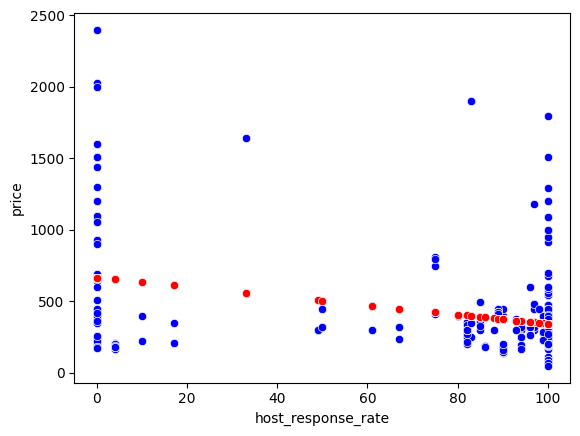

In [44]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 
sns.scatterplot(x='host_response_rate', y='price', color='blue', data=f2)
sns.scatterplot(x='host_response_rate', y='Prediccion_host_response_rate', color='red', data=f2)
#sns.lineplot(x='host_response_rate', y='Predicciones1', color='red', data=f2)

<Axes: xlabel='host_is_superhost', ylabel='price'>

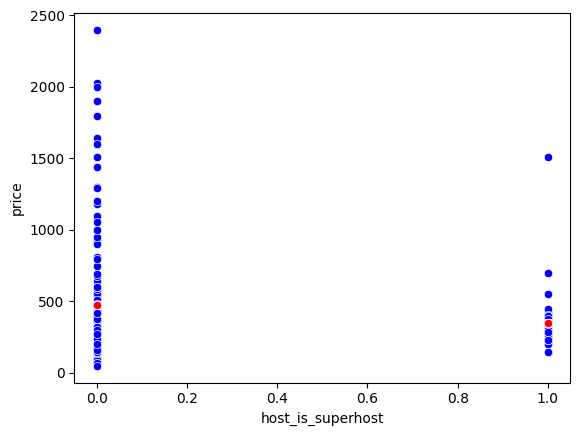

In [45]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 
sns.scatterplot(x='host_is_superhost', y='price', color='blue', data=f2)
sns.scatterplot(x='host_is_superhost', y='Prediccion_host_is_superhost', color='red', data=f2)
#sns.lineplot(x='host_is_superhost', y='Predicciones2', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='price'>

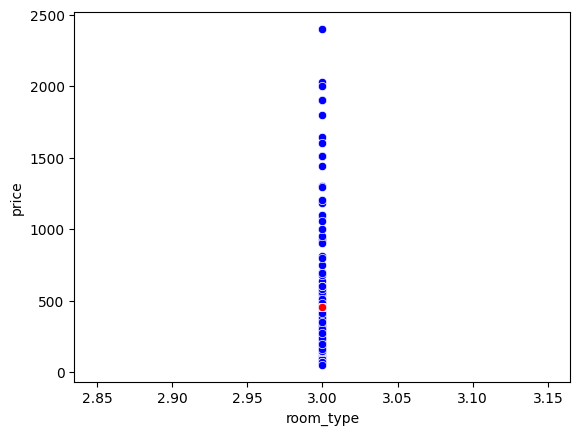

In [46]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 
sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='room_type', y='Prediccion_room_type', color='red', data=f2)
#sns.lineplot(x='host_response_rate', y='Predicciones1', color='red', data=f2)

<Axes: xlabel='host_identity_verified', ylabel='price'>

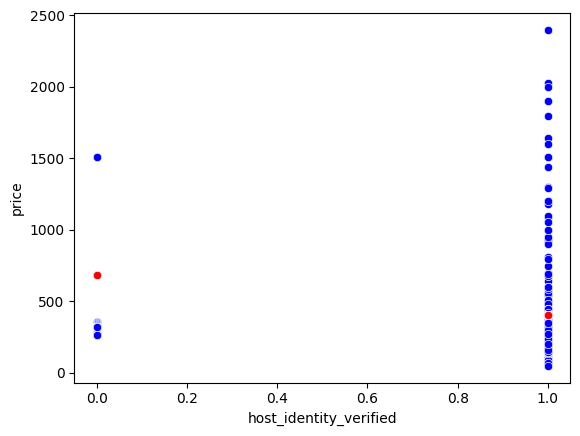

In [47]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 
sns.scatterplot(x='host_identity_verified', y='price', color='blue', data=f2)
sns.scatterplot(x='host_identity_verified', y='Prediccion_host_identity_verified', color='red', data=f2)
#sns.lineplot(x='host_response_rate', y='Predicciones1', color='red', data=f2)

<Axes: xlabel='property_type', ylabel='price'>

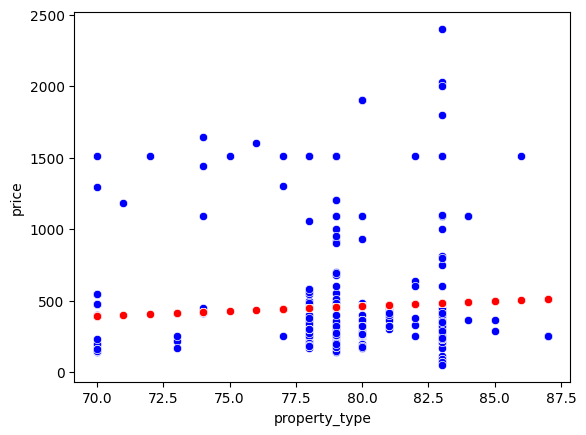

In [48]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 
sns.scatterplot(x='property_type', y='price', color='blue', data=f2)
sns.scatterplot(x='property_type', y='Prediccion_property_type', color='red', data=f2)
#sns.lineplot(x='host_response_rate', y='Predicciones1', color='red', data=f2)

<Axes: xlabel='instant_bookable', ylabel='price'>

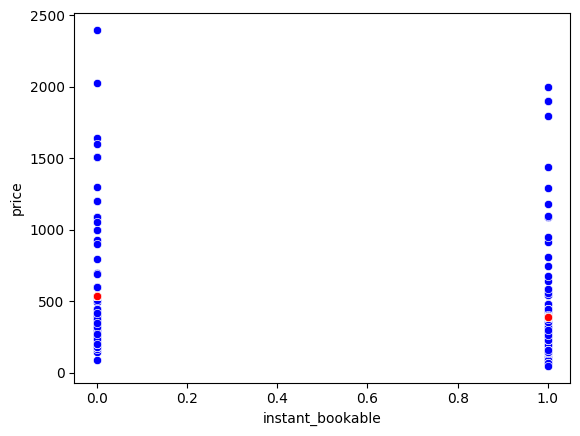

In [49]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 
sns.scatterplot(x='instant_bookable', y='price', color='blue', data=f2)
sns.scatterplot(x='instant_bookable', y='Prediccion_instant_bookable', color='red', data=f2)
#sns.lineplot(x='host_response_rate', y='Predicciones1', color='red', data=f2)

<Axes: title={'center': 'Precio en relación a calificación de limpieza predecido'}, xlabel='review_scores_cleanliness', ylabel='price'>

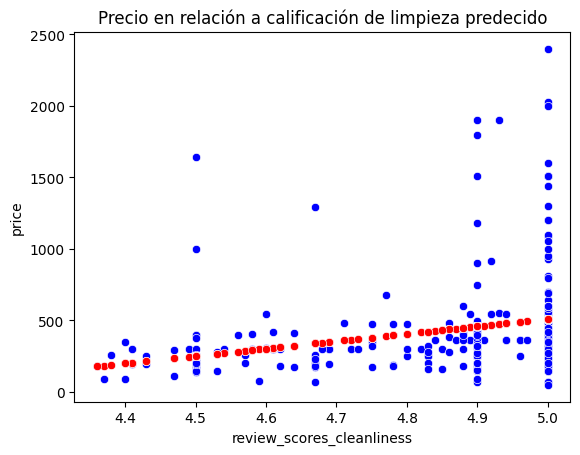

In [50]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 
plt.title("Precio en relación a calificación de limpieza predecido")
sns.scatterplot(x='review_scores_cleanliness', y='price', color='blue', data=f2)
sns.scatterplot(x='review_scores_cleanliness', y='Prediccion_review_scores_cleanliness', color='red', data=f2)
#sns.lineplot(x='host_response_rate', y='Predicciones1', color='red', data=f2)

<Axes: title={'center': 'Capacidad en relación a cantidad de baños predecido'}, xlabel='bathrooms', ylabel='accommodates'>

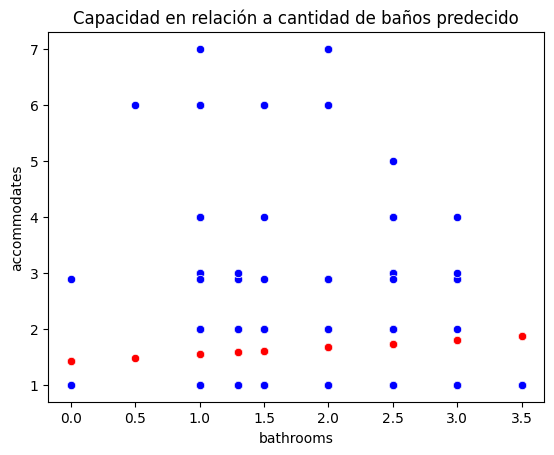

In [51]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 
plt.title("Capacidad en relación a cantidad de baños predecido")
sns.scatterplot(x='bathrooms', y='accommodates', color='blue', data=f2)
sns.scatterplot(x='bathrooms', y='Prediccion_bathrooms', color='red', data=f2)
#sns.lineplot(x='host_response_rate', y='Predicciones1', color='red', data=f2)

**Coeficiente de Determinacion**

In [52]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter= model.score(X=Var_Indep, y=Var_Dep)
coef_Deter

0.11238812500386286

In [53]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter2= model2.score(X=Var_Indep2, y=Var_Dep)
coef_Deter2

0.00928509522499088

In [54]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter3= model3.score(X=Var_Indep3, y=Var_Dep)
coef_Deter3

0.0

In [55]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter4= model4.score(X=Var_Indep4, y=Var_Dep)
coef_Deter4

0.06441181255444517

In [56]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter5= model5.score(X=Var_Indep5, y=Var_Dep)
coef_Deter5

0.0030781106977749717

In [57]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter6= model6.score(X=Var_Indep6, y=Var_Dep)
coef_Deter6

0.030863138455546668

In [58]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter7= model7.score(X=Var_Indep7, y=Var_Dep)
coef_Deter7

0.04122220553622713

In [59]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter8= model8.score(X=Var_Indep8, y=Var_Dep2)
coef_Deter8

0.006296681287526473

**Coeficientes de correlacion**

In [60]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

np.float64(0.33524338174505824)

In [61]:
coef_Correl2=np.sqrt(coef_Deter2)
coef_Correl2

np.float64(0.09635919896403705)

In [62]:
coef_Correl3=np.sqrt(coef_Deter2)
coef_Correl3

np.float64(0.09635919896403705)

In [63]:
coef_Correl4=np.sqrt(coef_Deter4)
coef_Correl4

np.float64(0.25379482373453793)

In [64]:
coef_Correl5=np.sqrt(coef_Deter5)
coef_Correl5

np.float64(0.05548072365943844)

In [65]:
coef_Correl6=np.sqrt(coef_Deter6)
coef_Correl6

np.float64(0.17567907802452365)

In [66]:
coef_Correl7=np.sqrt(coef_Deter7)
coef_Correl7

np.float64(0.20303252334595837)

In [67]:
coef_Correl8=np.sqrt(coef_Deter8)
coef_Correl8

np.float64(0.07935163065448922)

In [68]:
#eliminamos room_type y su prediccion 
f2= f2.drop(['room_type', 'Prediccion_room_type' ], axis=1)

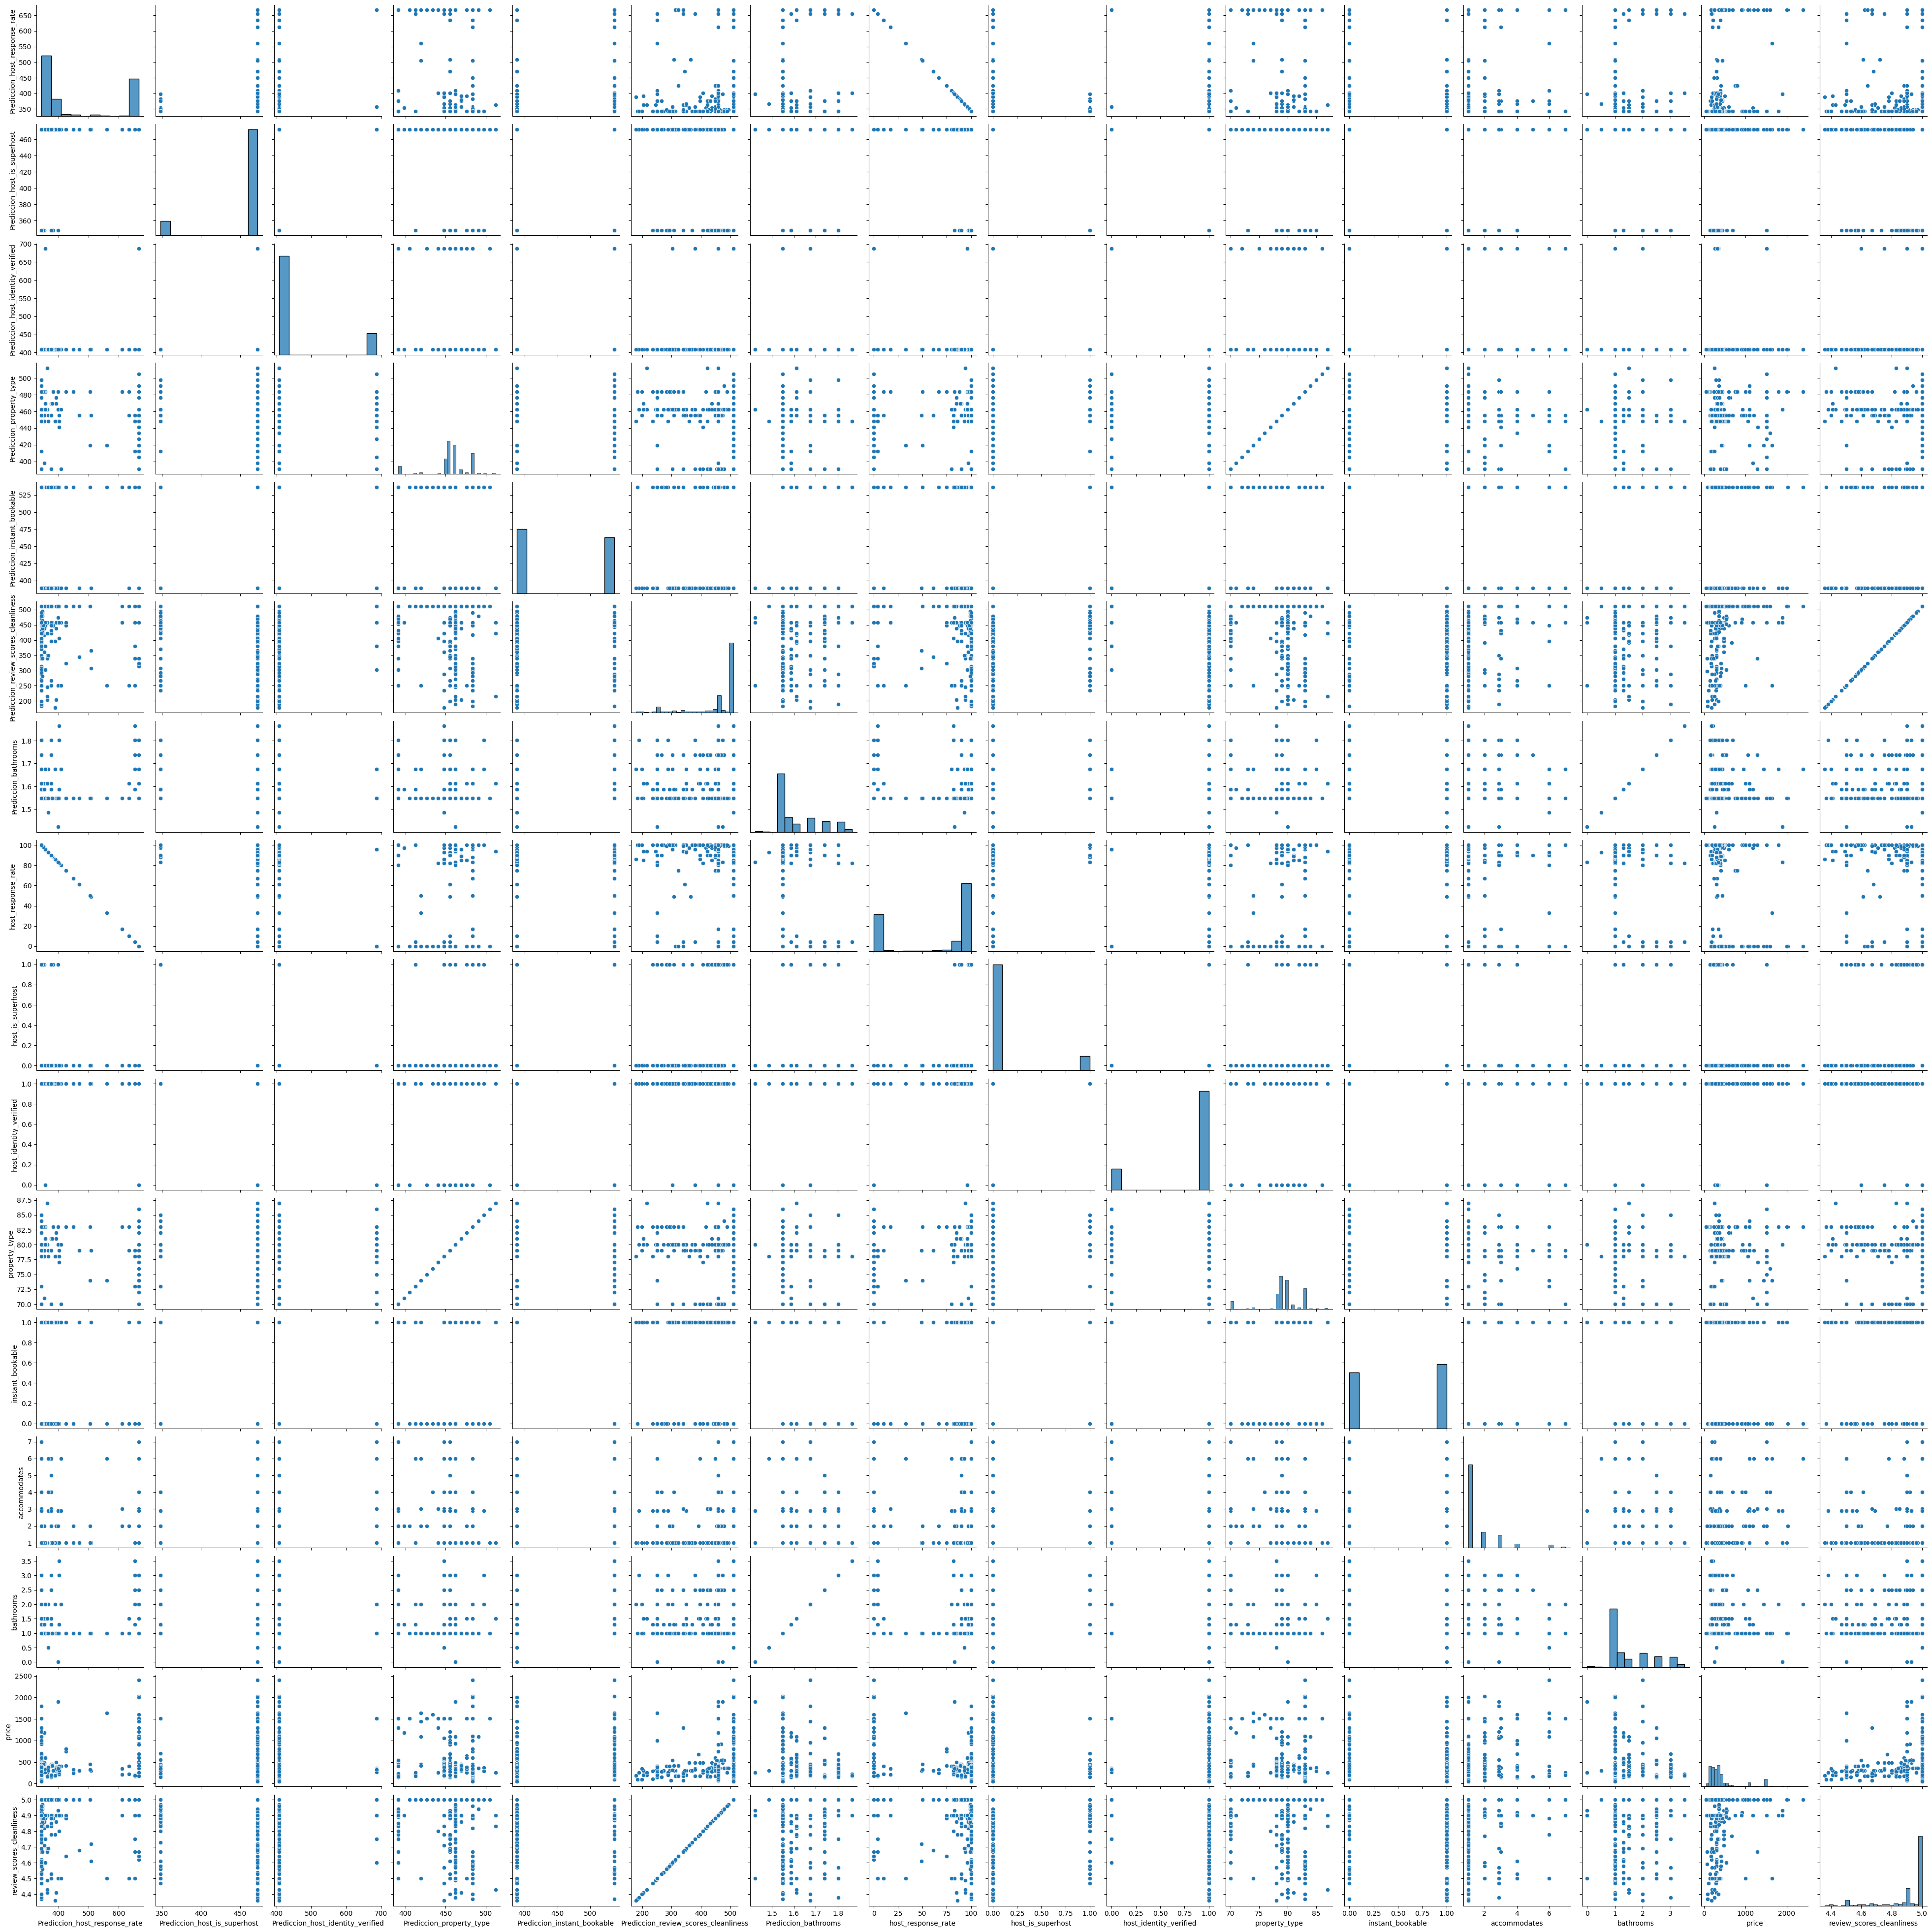

In [69]:
#Graficamos todas las dispersiones entre todas las variables
sns.pairplot(f2)

In [70]:
#Analizar categorias de una columna
df6 = f2.groupby(['host_response_rate'])['host_response_rate'].count()
df6

host_response_rate
0.0       69
4.0       54
10.0       2
17.0       2
33.0       1
49.0       2
50.0       2
61.0       2
67.0       2
75.0       5
80.0       2
82.0      15
83.0       4
85.0       5
86.0       2
88.0       1
89.0       5
90.0      25
93.0       3
94.0      15
96.0      49
97.0       9
98.0       1
99.0      18
100.0    106
Name: host_response_rate, dtype: int64

In [71]:
#Encontramos todas las correlaciones entre las variables 
Corr_Factors= f2.corr()
Corr_Factors

,Prediccion_host_response_rate,Prediccion_host_is_superhost,Prediccion_host_identity_verified,Prediccion_property_type,Prediccion_instant_bookable,Prediccion_review_scores_cleanliness,Prediccion_bathrooms,host_response_rate,host_is_superhost,host_identity_verified,property_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
Prediccion_host_response_rate,1.000000,0.286184,-0.001211,0.047290,0.569687,0.231429,0.077524,-1.000000,-0.286184,0.001211,0.047290,-0.569687,0.025685,0.077524,0.335243,0.231429
Prediccion_host_is_superhost,0.286184,1.000000,0.171043,-0.145458,0.067512,0.106260,0.112288,-0.286184,-1.000000,-0.171043,-0.145458,-0.067512,0.071444,0.112288,0.096359,0.106260
Prediccion_host_identity_verified,-0.001211,0.171043,1.000000,0.088206,-0.132394,0.230356,-0.241660,0.001211,-0.171043,-1.000000,0.088206,0.132394,-0.082419,-0.241660,0.253795,0.230356
Prediccion_property_type,0.047290,-0.145458,0.088206,1.000000,0.018435,-0.029326,-0.265133,-0.047290,0.145458,-0.088206,1.000000,-0.018435,-0.134674,-0.265133,0.055481,-0.029326
Prediccion_instant_bookable,0.569687,0.067512,-0.132394,0.018435,1.000000,0.175931,0.091362,-0.569687,-0.067512,0.132394,0.018435,-1.000000,0.082470,0.091362,0.175679,0.175931
Prediccion_review_scores_cleanliness,0.231429,0.106260,0.230356,-0.029326,0.175931,1.000000,-0.024730,-0.231429,-0.106260,-0.230356,-0.029326,-0.175931,-0.021192,-0.024730,0.203033,1.000000
Prediccion_bathrooms,0.077524,0.112288,-0.241660,-0.265133,0.091362,-0.024730,1.000000,-0.077524,-0.112288,0.241660,-0.265133,-0.091362,0.079352,1.000000,-0.277662,-0.024730
host_response_rate,-1.000000,-0.286184,0.001211,-0.047290,-0.569687,-0.231429,-0.077524,1.000000,0.286184,-0.001211,-0.047290,0.569687,-0.025685,-0.077524,-0.335243,-0.231429
host_is_superhost,-0.286184,-1.000000,-0.171043,0.145458,-0.067512,-0.106260,-0.112288,0.286184,1.000000,0.171043,0.145458,0.067512,-0.071444,-0.112288,-0.096359,-0.106260
host_identity_verified,0.001211,-0.171043,-1.000000,-0.088206,0.132394,-0.230356,0.241660,-0.001211,0.171043,1.000000,-0.088206,-0.132394,0.082419,0.241660,-0.253795,-0.230356


In [72]:
#Encontramos el valor absoluto de todas las correlaciones entre las variables 
Corr_Factors1= abs(Corr_Factors)
Corr_Factors1

,Prediccion_host_response_rate,Prediccion_host_is_superhost,Prediccion_host_identity_verified,Prediccion_property_type,Prediccion_instant_bookable,Prediccion_review_scores_cleanliness,Prediccion_bathrooms,host_response_rate,host_is_superhost,host_identity_verified,property_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
Prediccion_host_response_rate,1.000000,0.286184,0.001211,0.047290,0.569687,0.231429,0.077524,1.000000,0.286184,0.001211,0.047290,0.569687,0.025685,0.077524,0.335243,0.231429
Prediccion_host_is_superhost,0.286184,1.000000,0.171043,0.145458,0.067512,0.106260,0.112288,0.286184,1.000000,0.171043,0.145458,0.067512,0.071444,0.112288,0.096359,0.106260
Prediccion_host_identity_verified,0.001211,0.171043,1.000000,0.088206,0.132394,0.230356,0.241660,0.001211,0.171043,1.000000,0.088206,0.132394,0.082419,0.241660,0.253795,0.230356
Prediccion_property_type,0.047290,0.145458,0.088206,1.000000,0.018435,0.029326,0.265133,0.047290,0.145458,0.088206,1.000000,0.018435,0.134674,0.265133,0.055481,0.029326
Prediccion_instant_bookable,0.569687,0.067512,0.132394,0.018435,1.000000,0.175931,0.091362,0.569687,0.067512,0.132394,0.018435,1.000000,0.082470,0.091362,0.175679,0.175931
Prediccion_review_scores_cleanliness,0.231429,0.106260,0.230356,0.029326,0.175931,1.000000,0.024730,0.231429,0.106260,0.230356,0.029326,0.175931,0.021192,0.024730,0.203033,1.000000
Prediccion_bathrooms,0.077524,0.112288,0.241660,0.265133,0.091362,0.024730,1.000000,0.077524,0.112288,0.241660,0.265133,0.091362,0.079352,1.000000,0.277662,0.024730
host_response_rate,1.000000,0.286184,0.001211,0.047290,0.569687,0.231429,0.077524,1.000000,0.286184,0.001211,0.047290,0.569687,0.025685,0.077524,0.335243,0.231429
host_is_superhost,0.286184,1.000000,0.171043,0.145458,0.067512,0.106260,0.112288,0.286184,1.000000,0.171043,0.145458,0.067512,0.071444,0.112288,0.096359,0.106260
host_identity_verified,0.001211,0.171043,1.000000,0.088206,0.132394,0.230356,0.241660,0.001211,0.171043,1.000000,0.088206,0.132394,0.082419,0.241660,0.253795,0.230356


<Axes: >

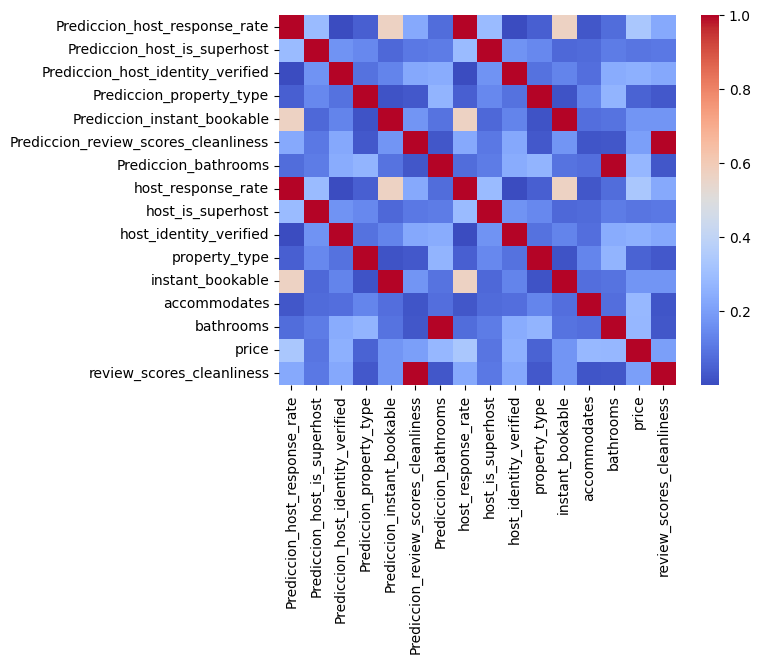

In [73]:
#Graficamos el mapa de calor de las coeficientes de correlación 
Heart_Nap = sns.heatmap(Corr_Factors1, cmap= 'coolwarm')
Heart_Nap

<Axes: >

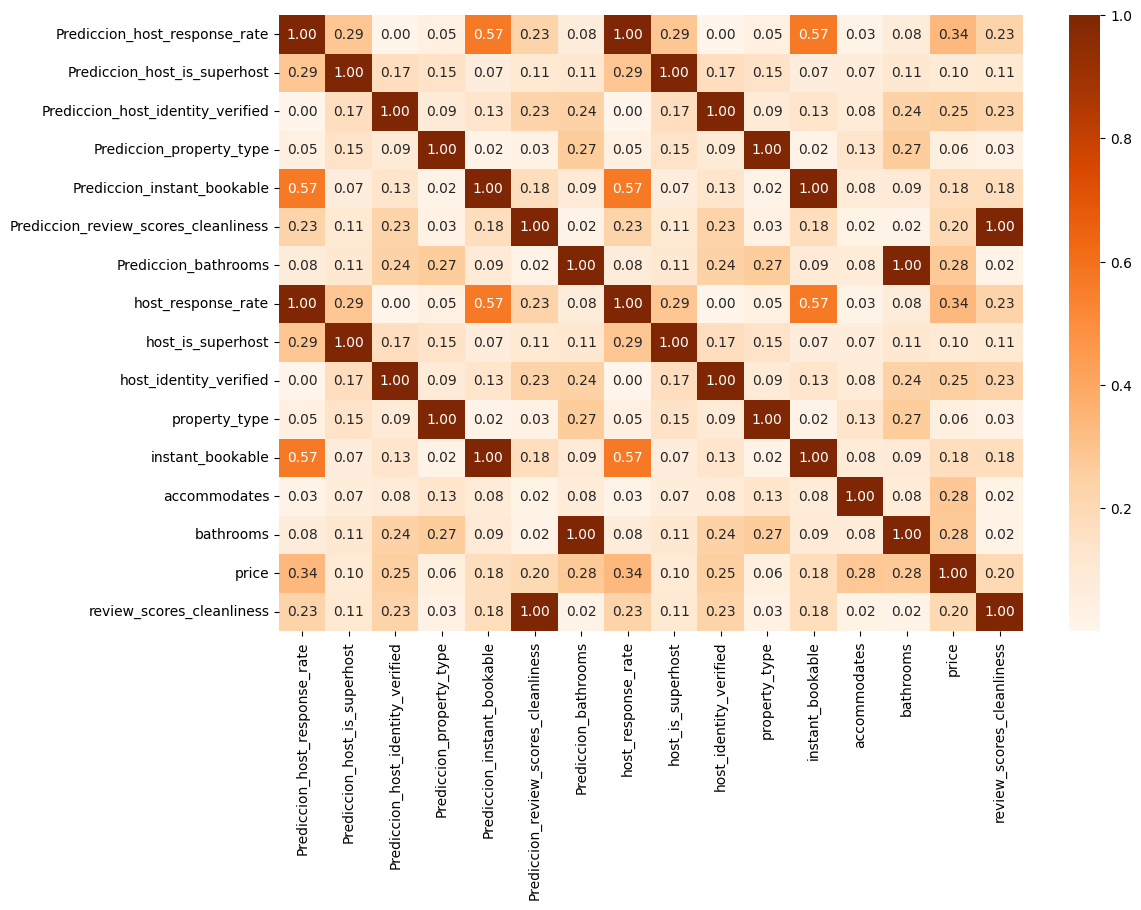

In [74]:
#Ajustamos el mapa de calor de las coeficientes de correlación 
plt.figure(figsize=(12,8))
Heart_Nap = sns.heatmap(Corr_Factors1, cmap= 'Oranges', annot=True, fmt=".2f")
Heart_Nap

In [75]:
# Obtener R² de cada modelo
r2_1 = model.score(Var_Indep, Var_Dep)
r2_2 = model2.score(Var_Indep2, Var_Dep)
r2_3 = model3.score(Var_Indep3, Var_Dep)
r2_4 = model4.score(Var_Indep4, Var_Dep)
r2_5 = model5.score(Var_Indep5, Var_Dep)
r2_6 = model6.score(Var_Indep6, Var_Dep)
r2_7 = model7.score(Var_Indep7, Var_Dep)
r2_8 = model8.score(Var_Indep8, Var_Dep2)

# Guardar los resultados en un diccionario
r2_values = {
    "host_response_rate": r2_1,
    "host_is_superhost": r2_2,
    "room_type": r2_3,
    "host_identity_verified": r2_4,
    "property_type": r2_5,
    "instant_bookable": r2_6,
    "review_scores_cleanliness": r2_7,
    "bathrooms": r2_8
}

# Ordenar y mostrar las 3 mejores variables
top_3 = sorted(r2_values.items(), key=lambda x: x[1], reverse=True)[:3]
print("Las 3 variables con mayor correlación son:")
for variable, r2 in top_3:
    print(f"{variable}: R² = {r2:.4f}")

Las 3 variables con mayor correlación son:
host_response_rate: R² = 0.1124
host_identity_verified: R² = 0.0644
review_scores_cleanliness: R² = 0.0412
